# Analyse des Correspondances Multiples (ACM)

In [1]:
# Chargement des données
import pandas as pd
# Données actives
A = pd.read_excel("./scientisttoolsdoc/donnee/races_canines_acm.xls",header=0,sheet_name=0,index_col=0)
# Individus supplémentaires
B = pd.read_excel("./scientisttoolsdoc/donnee/races_canines_acm.xls",header=0,sheet_name=1,index_col=0)
# Variables qualitative supplémentaires
C = pd.read_excel("./scientisttoolsdoc/donnee/races_canines_acm.xls",header=0,sheet_name=2,index_col=0)
# Variables quantitatives supplémentaires
D = pd.read_excel("./scientisttoolsdoc/donnee/races_canines_acm.xls",header=0,sheet_name=3,index_col=0)
C.index = D.index = A.index
# Concaténation
Data = pd.concat([pd.concat([A,B],axis=0),C,D],axis=1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Beauceron to Wisky
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Taille        33 non-null     object 
 1   Poids         33 non-null     object 
 2   Velocite      33 non-null     object 
 3   Intelligence  33 non-null     object 
 4   Affection     33 non-null     object 
 5   Agressivite   33 non-null     object 
 6   Fonction      27 non-null     object 
 7   Cote          27 non-null     float64
dtypes: float64(1), object(7)
memory usage: 2.3+ KB


In [2]:
from scientisttools.decomposition import MCA

In [3]:
# ACM avec les éléments supplémentaires
my_mca = MCA(n_components=None,
             row_labels=A.index,
             var_labels=A.columns,
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=B.index,
             quali_sup_labels=["Fonction"],
             quanti_sup_labels=["Cote"],
             parallelize=False)
# Estimation
my_mca.fit(Data)

MCA(quali_sup_labels=['Fonction'], quanti_sup_labels=['Cote'],
    row_labels=Index(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog', 'Bull-Mastif',
       'Caniche', 'Chihuahua', 'Cocker', 'Colley', 'Dalmatien', 'Doberman',
       'Dogue All', 'Epag. Breton', 'Epag. Français', 'Fox-Hound',
       'Fox-Terrier', 'Gd Bleu Gasc', 'Labrador', 'Levrier', 'Mastiff',
       'Pekinois', 'Pointer', 'St-Bernard', 'Setter', 'Teckel', 'Terre-Neuve'],
      dtype='object', name='Chien'),
    row_sup_labels=Index(['Medor', 'Djeck', 'Taico', 'Rocky', 'Boudog', 'Wisky'], dtype='object', name='Chien'),
    var_labels=Index(['Taille', 'Poids', 'Velocite', 'Intelligence', 'Affection',
       'Agressivite'],
      dtype='object'))

In [4]:
from scientisttools.extractfactor import summaryMCA
summaryMCA(my_mca)

                     Multiple Correspondance Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6  \
Variance                  0.482   0.385   0.211   0.158   0.150   0.123   
Difference                0.097   0.174   0.053   0.007   0.027   0.042   
% of var.                28.896  23.084  12.657   9.453   9.008   7.398   
Cumulative of % of var.  28.896  51.981  64.638  74.091  83.099  90.497   

                          Dim.7   Dim.8   Dim.9   Dim.10  
Variance                  0.081   0.046   0.024    0.008  
Difference                0.036   0.022   0.016    0.008  
% of var.                 4.888   2.740   1.413    0.463  
Cumulative of % of var.  95.385  98.125  99.537  100.000  

Individuals (the 10 first)

             d(i,G)   p(i)  I(i,G)  Dim.1    ctr   cos2  Dim.2     ctr   cos2  \
Chien                                                                           
Beauceron     1.065  0.037 

In [5]:
# Extract eigenvalues/variances
from scientisttools.extractfactor import get_eig
get_eig(my_mca)

,eigenvalue,difference,proportion,cumulative
Dim.1,0.481606,0.096869,28.896370,28.896370
Dim.2,0.384737,0.173783,23.084237,51.980607
Dim.3,0.210954,0.053400,12.657243,64.637850
Dim.4,0.157554,0.007421,9.453242,74.091092
Dim.5,0.150133,0.026837,9.007960,83.099052
Dim.6,0.123295,0.041833,7.397718,90.496770
Dim.7,0.081462,0.035793,4.887748,95.384518
Dim.8,0.045670,0.022128,2.740185,98.124703
Dim.9,0.023542,0.015829,1.412515,99.537218
Dim.10,0.007713,0.007713,0.462782,100.000000


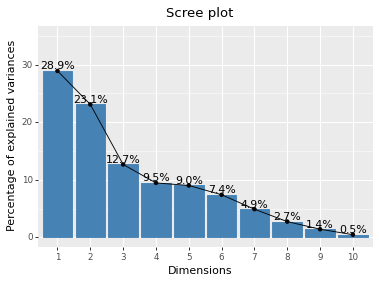

In [6]:
# Visualize eigenvalues/variances
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(my_mca,add_labels=True,ylim=(0,35))
print(p)

# Extract and visualize results for modalities

In [7]:
# Extract the results for categories
from scientisttools.extractfactor import get_mca_mod
mod = get_mca_mod(my_mca)
print(mod.keys())

dict_keys(['coord', 'corrected_coord', 'cos2', 'contrib', 'vtest', 'infos', 'sup'])


In [8]:
# Coordinates of categories
mod["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Taille_Taille+,0.851088,-1.231720,1.016052,0.342456,-0.310040,0.118297,0.858306,-0.259599,0.307322,0.015208
Taille_Taille++,-0.836675,-0.020578,-0.051217,-0.170222,0.112663,-0.049965,-0.117844,0.056414,-0.144633,-0.121550
Taille_Taille-,1.184956,0.923897,-0.616000,0.120149,-0.019963,0.022569,-0.360553,0.064541,0.090411,0.249601
Poids_Poids+,-0.305405,-0.818876,-0.231272,-0.118364,-0.190201,0.012908,0.037178,-0.125673,-0.184946,0.097573
Poids_Poids++,-1.015134,0.973901,1.221595,0.067605,0.614518,0.289232,0.067864,0.641508,0.204009,0.071494
Poids_Poids-,1.168918,0.824345,-0.358770,0.164884,-0.051221,-0.203360,-0.107475,-0.181014,0.196151,-0.215436


In [10]:
# Corrected coordinates of categories
mod["corrected_coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Taille_Taille+,0.590637,-0.764001,0.466670,0.135931,-0.120131,0.041538,0.244974,-0.055478,0.047154,0.001336
Taille_Taille++,-0.580635,-0.012764,-0.023524,-0.067566,0.043653,-0.017544,-0.033635,0.012056,-0.022192,-0.010675
Taille_Taille-,0.822334,0.573067,-0.282927,0.047691,-0.007735,0.007925,-0.102908,0.013793,0.013872,0.021921
Poids_Poids+,-0.211945,-0.507926,-0.106223,-0.046982,-0.073697,0.004533,0.010611,-0.026857,-0.028377,0.008569
Poids_Poids++,-0.704481,0.604083,0.561075,0.026834,0.238107,0.101559,0.019369,0.137093,0.031302,0.006279
Poids_Poids-,0.811204,0.511318,-0.164782,0.065447,-0.019847,-0.071407,-0.030675,-0.038684,0.030096,-0.018920


In [ ]:
# Contribution of modalities
mod["contrib"].head(6)

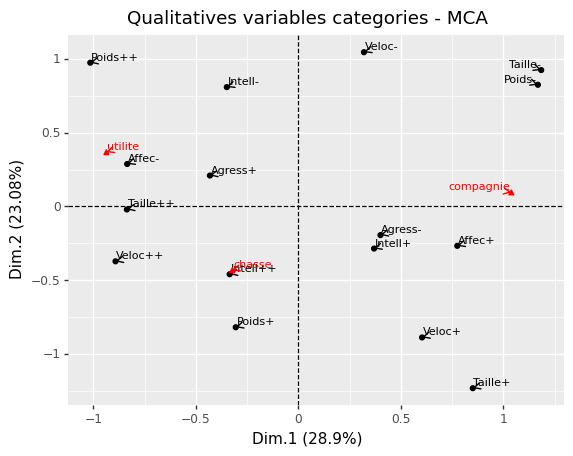

In [15]:
# Graph of modalities: default plot
from scientisttools.ggplot import fviz_mca_mod
p = fviz_mca_mod(my_mca,color = "black",repel=True)
print(p)

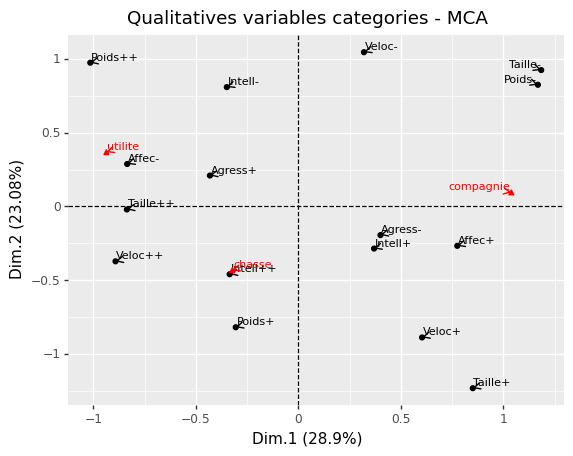

In [16]:
# Graph of modalities: default plot with corrected coordinates
p = fviz_mca_mod(my_mca,color="black",corrected=True,repel=True)
print(p)

It's possible to control variable colors using their contributions ("contrib") to the principal axes

In [12]:
p = fviz_mca_mod(my_mca,
                 color="contrib",
                 gradient_cols = c("#00AFBB", "#E7B800", "#FC4E07"),
                 repel=True)
print(p)

NameError: name 'fviz_mca_ind' is not defined

In [ ]:
p = fviz_mca_ind(my_mca,color="contrib",add_ellipse=True,repel=True)
print(p)

In [ ]:
from scientisttools.ggplot import fviz_mca_mod
p = fviz_mca_mod(my_mca,repel=True)
print(p)

In [ ]:
from scientisttools.extractfactor import get_mca_var
var = get_mca_var(my_mca)
var.keys()